In [9]:
import csv
import pandas as pd
import numpy as np

In [10]:


# Load the CSV file
df = pd.read_csv('results/results_fin.csv')

# Calculate the accuracy
accuracy = {}

for inx in ['simple_lenght','tsp_lenght','valid_lenght']:
    #accuracy[inx] = df['true_lenght'] / df[inx]
    accuracy[inx] = (df['true_lenght']-df[inx]) / df['true_lenght']


Datapoints 200


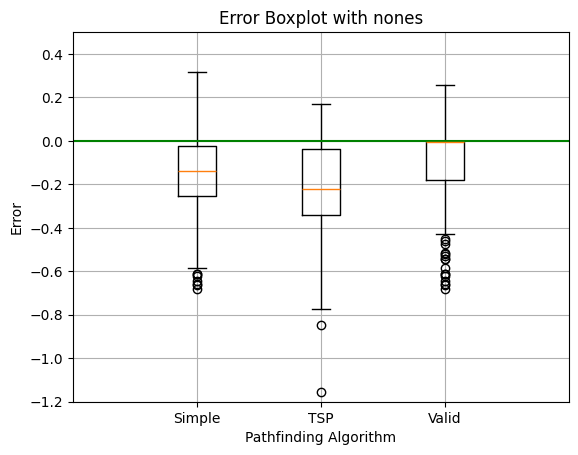

In [11]:
#analysis change nan to simple
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
accuracy_values = []
for key in accuracy:
    accuracy_values.append(list(accuracy[key]))



for i in range(len(accuracy_values)):
    tmp=[]
    for j in range(len(accuracy_values[i])):
        if np.isnan(accuracy_values[i][j]):
            accuracy_values[i][j] = accuracy_values[0][j]

print("Datapoints",len(accuracy_values[0]))
# Plot the accuracy as a boxplot
plt.boxplot(accuracy_values, labels=['Simple', 'TSP', 'Valid'])

plt.axis([0, 4, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Error')
plt.title('Error Boxplot with nones')

# Show the plot
plt.show()

In [12]:
# Calculate the mean square error
mse = []
for i in range(len(accuracy_values)):
    mse.append(0)
    for j in range(len(accuracy_values[i])):
        mse[i] += (accuracy_values[i][j])**2
    mse[i] = mse[i]/len(accuracy_values[i])


# Print the result
print("Mean Square Error:", mse)

Mean Square Error: [0.059919615102029866, 0.08671508719773094, 0.04508755660560438]


Datapoints 101


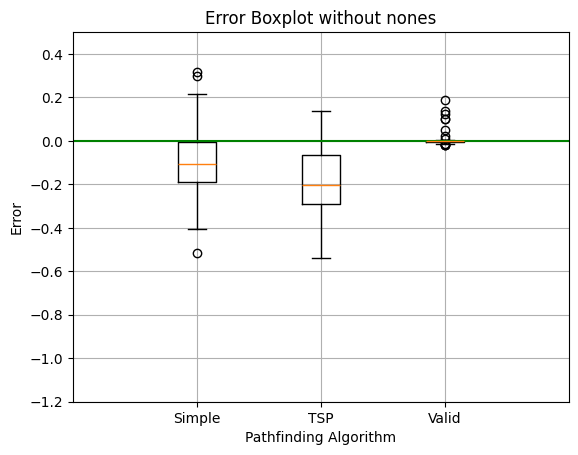

In [13]:
#analysis delete nan values
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
accuracy_values_n = []
for key in accuracy:
    accuracy_values_n.append(list(accuracy[key]))



for i in range(len(accuracy_values_n)):
    nones=[]
    for j in range(len(accuracy_values_n[i])):
        if np.isnan(accuracy_values_n[i][j]):
            nones.append(j)

for i in range(len(accuracy_values_n)):
    accuracy_values_n[i] = [x for j, x in enumerate(accuracy_values_n[i]) if j not in nones]

print("Datapoints",len(accuracy_values_n[0]))
# Plot the accuracy as a boxplot
plt.boxplot(accuracy_values_n, labels=['Simple', 'TSP', 'Valid'])

plt.axis([0, 4, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Error')
plt.title('Error Boxplot without nones')

# Show the plot
plt.show()

In [14]:
# Calculate the mean square error
mse = []
mse_true = []
for i in range(len(accuracy_values)):
    mse.append(0)
    mse_true.append(0)
    for j in range(len(accuracy_values[i])):
        if j not in nones:
            mse[i] += (accuracy_values[i][j])**2
            mse_true[i] += (df.iloc[j][2+i]-df.iloc[j][1])**2
    mse[i] = mse[i]/(len(accuracy_values[i])-len(nones))
    mse_true[i] = mse_true[i]/(len(accuracy_values[i])-len(nones))


# Print the result
print("Mean Square Error:", mse)
print("Mean Square Error True:", mse_true)

Mean Square Error: [0.030314546211126694, 0.06113627740971232, 0.0009441333469178426]
Mean Square Error True: [24794409.091512896, 14454569.335852528, 5575842.592727215]


C:\Users\freyt\AppData\Local\Temp\ipykernel_29452\1675743599.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mse_true[i] += (df.iloc[j][2+i]-df.iloc[j][1])**2


In [15]:
lenghts = []

for i in range(len(df['simple_path'])):
    lenghts.append(df['simple_path'][i].count('('))

print("Simple path lenghts",lenghts)
print("Simple path mean",np.mean(lenghts))
lenghts_not_nan = [x for j, x in enumerate(lenghts) if j not in nones]
print("Simple path mean without nan",np.mean(lenghts_not_nan))

Simple path lenghts [268, 10, 290, 264, 308, 217, 101, 329, 255, 154, 83, 140, 204, 183, 81, 103, 251, 203, 107, 228, 16, 118, 121, 289, 231, 306, 153, 168, 45, 198, 179, 156, 43, 162, 307, 162, 164, 216, 121, 91, 157, 177, 216, 198, 111, 65, 188, 82, 28, 156, 96, 281, 245, 279, 200, 55, 106, 80, 206, 178, 232, 146, 310, 76, 213, 390, 236, 140, 84, 326, 140, 318, 146, 282, 268, 300, 217, 135, 202, 130, 110, 227, 343, 224, 45, 293, 187, 64, 172, 61, 232, 48, 138, 98, 22, 256, 51, 189, 308, 304, 270, 221, 282, 92, 221, 303, 244, 202, 175, 376, 146, 253, 88, 39, 194, 215, 164, 36, 309, 29, 180, 193, 372, 73, 226, 142, 100, 248, 53, 292, 310, 53, 189, 200, 252, 39, 95, 355, 313, 148, 222, 62, 194, 393, 114, 300, 14, 252, 69, 78, 238, 104, 12, 191, 162, 171, 72, 105, 41, 251, 190, 104, 341, 138, 50, 66, 267, 166, 355, 111, 255, 269, 249, 277, 183, 238, 27, 64, 63, 68, 99, 5, 178, 280, 41, 165, 151, 145, 148, 268, 73, 125, 162, 219, 316, 164, 199, 344, 367, 50]
Simple path mean 177.545
Simpl

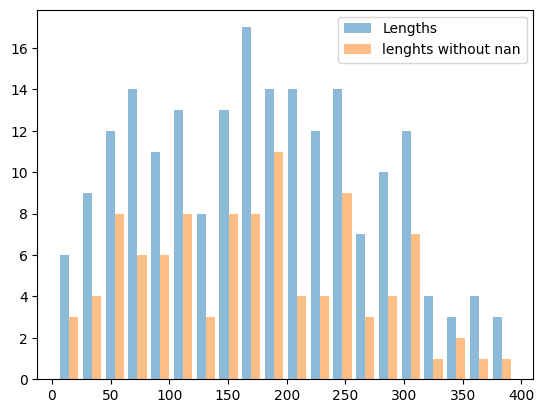

In [16]:
plt.hist((lenghts,lenghts_not_nan), bins=20, alpha=0.5, label=('Lengths','lenghts without nan'))
plt.legend(loc='upper right')